In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
# Get dontation data
ind_df = pd.read_csv('../trimmedData/2016i.csv', names=['CID', 'i'], header=0)
print(ind_df.head())
pac_df = pd.read_csv('../trimmedData/2016p.csv', names=['CID', 'p'], header=0)
print(pac_df.head())

         CID          i
0             1956547.0
1  C00000059     3114.0
2  C00000422    59031.0
3  C00000638    11596.0
4  C00000729    30655.0
         CID          p
0  N00000019  157030977
1  N00000036   14849441
2  N00000078     807910
3  N00000153    1347842
4  N00000179     472156


In [3]:
df = ind_df.merge(pac_df, how='outer', on='CID').fillna(0)
print(len(df))
df.head()

69499


,CID,i,p
0,,1956547.0,0.0
1,,457834.0,0.0
2,,316190.0,0.0
3,,60111.0,0.0
4,,23200.0,0.0


In [4]:
# Create a drived column of total
df['total'] = df['i'] + df['p']
df.head()

,CID,i,p,total
0,,1956547.0,0.0,1956547.0
1,,457834.0,0.0,457834.0
2,,316190.0,0.0,316190.0
3,,60111.0,0.0,60111.0
4,,23200.0,0.0,23200.0


In [5]:
# Read in the list of elected representatives

In [6]:
house = pd.read_csv("../lukeData/final2016House.csv")
senate = pd.read_csv("../lukeData/final2016Senate.csv")
elected_df = pd.concat([house, senate])
elected_df.head()

,name,person,CID
0,Robert Aderholt,400004,N00003028
1,Joe Barton,400018,N00005656
2,Xavier Becerra,400021,N00009774
3,Rob Bishop,400029,N00025292
4,Sanford Bishop,400030,N00002674


In [7]:
print(len(elected_df))
elected_df = elected_df.drop_duplicates(subset=['CID'])
print(len(elected_df))

534
385


In [8]:
elected = list(elected_df[elected_df['CID'] != -1]['CID'])

In [9]:
df['elected'] = df['CID'].apply(lambda x: x in elected)
df.head()

,CID,i,p,total,elected
0,,1956547.0,0.0,1956547.0,False
1,,457834.0,0.0,457834.0,False
2,,316190.0,0.0,316190.0,False
3,,60111.0,0.0,60111.0,False
4,,23200.0,0.0,23200.0,False


In [10]:
print(len(df))
df = df[(df['elected']) | (df['total'] < 500000)]
print(len(df))
df = df.drop_duplicates(subset=['CID'])
print(len(df))
df['elected'].value_counts()

69499
65528
7245


False    6864
True      381
Name: elected, dtype: int64

In [11]:
def noisify(x):
    nx = x + (np.random.random() * x * .1)
    if nx < 0:
        nx = 0
    return nx

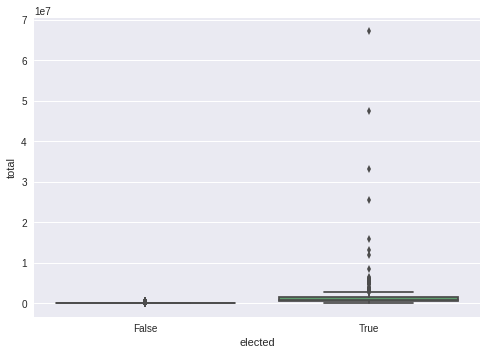

In [12]:
plt.style.use('seaborn')
sns.boxplot(y='total', x='elected', data=df)

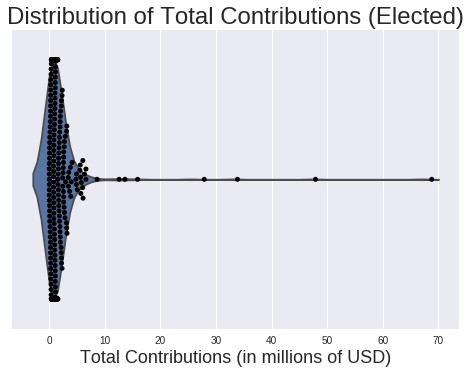

In [13]:
plt.style.use('seaborn')
plt.title("Distribution of Total Contributions (Elected)", size=24)
sns.violinplot(df[df['elected'] == True]['total'] / 1000000)
sns.swarmplot(df[df['elected'] == True]['total'].apply(noisify) / 1000000, color="black")
plt.xlabel("Total Contributions (in millions of USD)", size=18)
plt.show()

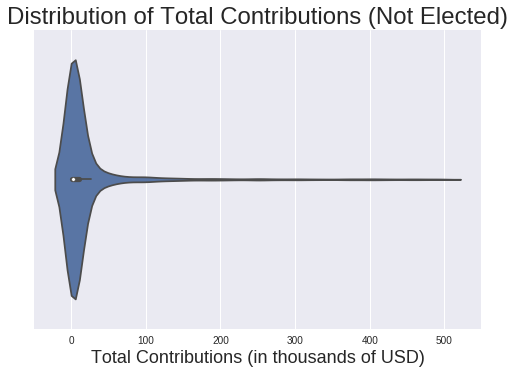

In [14]:
plt.style.use('seaborn')
plt.title("Distribution of Total Contributions (Not Elected)", size=24)
sns.violinplot(df[df['elected'] == False]['total']/1000)
plt.xlabel("Total Contributions (in thousands of USD)", size=18)
plt.show()

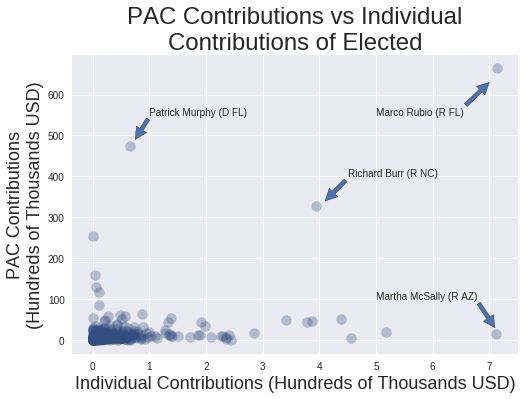

In [50]:
plt.style.use('seaborn')
plt.scatter(df[df['elected'] == True]['i'] / 100000, df[df['elected'] == True]['p'] / 100000, color=(0.2, 0.3, 0.5, 0.3), s=100)
plt.title("PAC Contributions vs Individual\nContributions of Elected", size=24)
plt.xlabel("Individual Contributions (Hundreds of Thousands USD)", size=18)
plt.ylabel("PAC Contributions\n(Hundreds of Thousands USD)", size=18)
plt.annotate(s="Marco Rubio (R FL)", xy=(7, 630), xytext=(5, 550), arrowprops={})
plt.annotate(s="Richard Burr (R NC)", xy=(4.1, 340), xytext=(4.5, 400), arrowprops={})
plt.annotate(s="Patrick Murphy (D FL)", xy=(.75, 490), xytext=(1, 550), arrowprops={})
plt.annotate(s="Martha McSally (R AZ)", xy=(7.1, 30), xytext=(5, 100), arrowprops={})
plt.show()

/home/wlifferth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


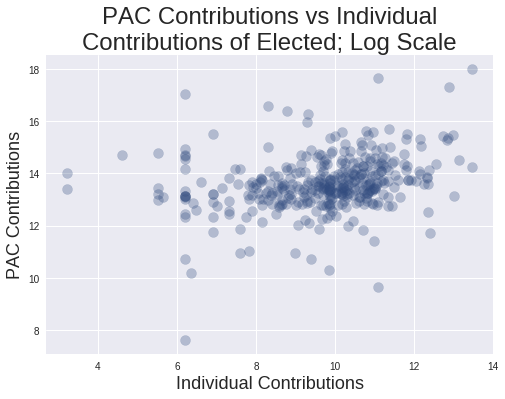

In [51]:
plt.style.use('seaborn')
plt.scatter(np.log(df[df['elected'] == True]['i']), np.log(df[df['elected'] == True]['p']), color=(0.2, 0.3, 0.5, 0.3), s=100)
plt.title("PAC Contributions vs Individual\nContributions of Elected; Log Scale", size=24)
plt.xlabel("Individual Contributions", size=18)
plt.ylabel("PAC Contributions", size=18)
plt.show()

## Get names df

In [17]:
import sys
sys.path.insert(0, '../naming')
from name16 import name

In [18]:
names = name(df[df['elected']==True][['CID']])
names.head()

../naming/name16.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  cand_data = pd.read_csv("../OpenSecrets/CampaignFin16/cands16.txt", sep="\|,\|", names=['year', 'cand_id', 'com_id', 'name', 'party', 'state'], index_col=False)


,CID,year,cand_id,com_id,name,party,state,district
0,N00000078,2016,H2NY14037,N00000078,Carolyn B Maloney,D,NY,NY12
1,N00000153,2016,H8MA02041,N00000153,Richard E Neal,D,MA,MA01
2,N00000179,2016,H4MA03022,N00000179,James P McGovern,D,MA,MA02
3,N00000267,2016,H8MA08071,N00000267,Michael E Capuano,D,MA,MA07
4,N00000515,2016,H6VT00160,N00000515,Peter Welch,D,VT,VT01


In [46]:
print("Highest total\n", df[df['elected'] == True].sort_values(by=['total'], ascending=False).head())
print("Highest individual\n", df[df['elected'] == True].sort_values(by=['i'], ascending=False).head())
print("Highest pac\n", df[df['elected'] == True].sort_values(by=['p'], ascending=False).head())

Highest total
              CID         i           p       total  elected
37024  N00030612  713663.0  66382164.0  67095827.0     True
55161  N00030980   66489.0  47402391.0  47468880.0     True
38328  N00033091  394782.0  32747994.0  33142776.0     True
54653  N00002221     500.0  25408924.0  25409424.0     True
33660  N00005195    4000.0  15839286.0  15843286.0     True
Highest individual
              CID         i           p       total  elected
37024  N00030612  713663.0  66382164.0  67095827.0     True
39313  N00033982  712246.0   1522561.0   2234807.0     True
36465  N00029260  518365.0   2045681.0   2564046.0     True
40695  N00035825  456638.0    498945.0    955583.0     True
37510  N00031103  437698.0   5280089.0   5717787.0     True
Highest pac
              CID         i           p       total  elected
37024  N00030612  713663.0  66382164.0  67095827.0     True
55161  N00030980   66489.0  47402391.0  47468880.0     True
38328  N00033091  394782.0  32747994.0  33142776.0  

In [43]:
names[names['com_id'].isin(['N00030612', 'N00030980', 'N00033091', 'N00002221'])]

,CID,year,cand_id,com_id,name,party,state,district
183,N00030612,2016,S0FL00338,N00030612,Marco Rubio,R,FL,FLS2
184,N00030612,2016,P60006723,N00030612,Marco Rubio,R,FL,FLS2
243,N00033091,2016,S6FL00319,N00033091,Patrick Murphy,D,FL,FLS2
244,N00033091,2016,H2FL22072,N00033091,Patrick Murphy,D,FL,FLS2
333,N00002221,2016,S4NC00089,N00002221,Richard Burr,R,NC,NCS2
356,N00030980,2016,S0NH00235,N00030980,Kelly Ayotte,R,NH,NHS1


In [45]:
names[names['com_id'].isin(['N00033982', 'N00029260'])]

,CID,year,cand_id,com_id,name,party,state,district
162,N00029260,2016,S6AZ00225,N00029260,Ann Kirkpatrick,D,AZ,AZS1
163,N00029260,2016,H8AZ01104,N00029260,Ann Kirkpatrick,D,AZ,AZS1
275,N00033982,2016,H2AZ08102,N00033982,Martha McSally,R,AZ,AZ02


404

## Predictions

In [71]:
df['i_n'] = (df['i'] - df['i'].min()) / df['i'].max()
df['p_n'] = (df['p'] - df['p'].min()) / df['p'].max()

In [73]:
clf = LogisticRegression()
clf.fit(df[['i_n', 'p_n']], df['elected'])
print(clf.score(df[['i_n', 'p_n']], df['elected']))
coeff = clf.coef_
print(coeff)

0.9479641131815045
[[3.45696284 6.58775631]]


In [64]:
house = pd.read_csv("../lukeData/final2014House.csv")
senate = pd.read_csv("../lukeData/final2014Senate.csv")
elected_14_df = pd.concat([house, senate])
elected_14_df.head()

,name,person,CID
0,Robert Aderholt,400004,N00003028
1,Robert Andrews,400008,N00000826
2,Spencer Bachus,400010,N00008091
3,Joe Barton,400018,N00005656
4,Xavier Becerra,400021,N00009774


In [65]:
print(len(elected_df))
elected_14_df = elected_df.drop_duplicates(subset=['CID'])
print(len(elected_df))

531
406


In [66]:
elected_14 = list(elected_df[elected_df['CID'] != -1]['CID'])

In [67]:
df['incumbent'] = df['CID'].apply(lambda x: x in elected_14)
df.head()

,CID,i,p,total,elected,i_n,p_n,incumbent
1,,457834.0,0.0,457834.0,False,0.641527,0.0,False
19,C00000059,3114.0,0.0,3114.0,False,0.004363,0.0,False
37,C00000422,59031.0,0.0,59031.0,False,0.082716,0.0,False
56,C00000638,11596.0,0.0,11596.0,False,0.016249,0.0,False
72,C00000729,30655.0,0.0,30655.0,False,0.042954,0.0,False


In [68]:
clf = LogisticRegression()
clf.fit(df[['i_n', 'p_n', 'incumbent']], df['elected'])
print(clf.score(df[['i_n', 'p_n', 'incumbent']], df['elected']))
ceoff = clf.coef_

0.9855072463768116


array([[3.83894635, 2.35474166, 6.32893207]])